In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('vehicle-data.csv')

In [3]:
dataset.shape

(101, 5)

In [4]:
dataset.head()

,Vehicle No,Section,Time,Subsection,Repair No
0,KB - 2126,General Repair,30,Differential Issue,14
1,KB - 2127,General Repair,40,Differential Issue,7
2,KB - 2128,General Repair,35,Differential Issue,29
3,KB - 2129,General Repair,26,Differential Issue,20
4,KB - 2130,General Repair,40,Differential Issue,21


In [5]:
dataset.describe()

,Time,Repair No
count,101.000000,101.000000
mean,29.613861,15.693069
std,6.410882,8.507341
min,20.000000,1.000000
25%,24.000000,9.000000
50%,30.000000,16.000000
75%,34.000000,22.000000
max,40.000000,30.000000


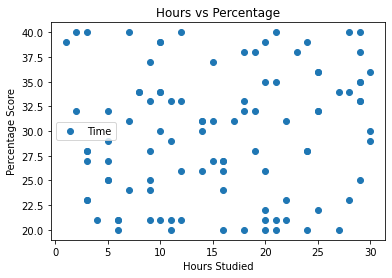

In [6]:
dataset.plot(x='Repair No', y='Time', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [7]:
X = dataset.iloc[:, 4].values # Repair Time
y = dataset.iloc[:, 2].values # Time
print(X)
print(y)

[14  7 29 20 21 20 16 20  6 10 14 22  5  6 24 21 23 24 25  9 29 14 20 30
  4 19 19 11  9  9 16 16 29 10 10 22  5 27 15 18  8 15  7  8 11 12 15 25
 25  3  5 30 25  3  9 24  9 10  3 10 28 18 17 12  3 29 25 11 10  7 19 12
  5 28 30  6 20 22 11 28 27 14 20  2  3  9 18 29 16  3 21  5  1 12 29 29
  2 16 24 21 18]
[30 40 35 26 40 21 26 39 21 39 31 31 29 21 28 21 38 28 36 25 40 31 35 36
 21 32 28 33 24 33 20 24 38 39 34 23 25 20 37 38 34 31 31 34 20 33 27 32
 22 28 27 29 32 23 28 20 37 30 40 21 23 20 31 26 23 33 36 21 34 24 38 21
 32 34 30 20 20 21 29 40 34 26 22 32 27 21 33 25 27 28 20 25 39 40 35 33
 40 27 39 35 32]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))

y_predict = linear_regressor.predict(X_test.reshape(-1, 1))

In [10]:
print(linear_regressor .intercept_)
print(linear_regressor .coef_)

[28.6690279]
[[0.05029467]]


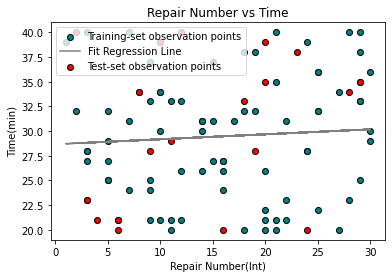

In [11]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train.reshape(-1, 1), linear_regressor.predict(X_train.reshape(-1, 1)), color='grey', label='Fit Regression Line')
plt.title('Repair Number vs Time')
plt.xlabel('Repair Number(Int)')
plt.ylabel('Time(min)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 6.550141826717937
Mean Squared Error: 53.01932196238363
Root Mean Squared Error: 7.281436806179371


In [25]:
#df = pd.DataFrame({'Actual': y_test.reshape(-1, 1), 'Predicted': y_predict.reshape(-1, 1)})
com = pd.DataFrame(data=[y_test, y_predict]).T
com.head()

,0,1
0,28,[29.624626646100626]
1,33,[29.57433197514243]
2,35,[30.127573355682557]
3,20,[29.87610000089159]
4,20,[28.97079592364411]


In [26]:
import joblib

In [28]:
filename = "model.sav"
joblib.dump(linear_regressor, filename)

['model.sav']

In [29]:
loaded_model = joblib.load(filename)

In [31]:
loaded_model.predict([[30]])

array([[30.17786803]])